In [5]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt

model = SentenceTransformer('all-mpnet-base-v2')

In [2]:
df_snli = pd.read_json("./snli_1.0/snli_1.0/snli_1.0_dev.jsonl", lines=True)
df_multnli = pd.read_json("./multinli_1.0/multinli_1.0/multinli_1.0_dev_matched.jsonl", lines=True)
df_snli.head()

,annotator_labels,captionID,gold_label,pairID,sentence1,sentence1_binary_parse,sentence1_parse,sentence2,sentence2_binary_parse,sentence2_parse
0,"[neutral, entailment, neutral, neutral, neutral]",4705552913.jpg#2,neutral,4705552913.jpg#2r1n,Two women are embracing while holding to go pa...,( ( Two women ) ( ( are ( embracing ( while ( ...,(ROOT (S (NP (CD Two) (NNS women)) (VP (VBP ar...,The sisters are hugging goodbye while holding ...,( ( The sisters ) ( ( are ( ( hugging goodbye ...,(ROOT (S (NP (DT The) (NNS sisters)) (VP (VBP ...
1,"[entailment, entailment, entailment, entailmen...",4705552913.jpg#2,entailment,4705552913.jpg#2r1e,Two women are embracing while holding to go pa...,( ( Two women ) ( ( are ( embracing ( while ( ...,(ROOT (S (NP (CD Two) (NNS women)) (VP (VBP ar...,Two woman are holding packages.,( ( Two woman ) ( ( are ( holding packages ) )...,(ROOT (S (NP (CD Two) (NN woman)) (VP (VBP are...
2,"[contradiction, contradiction, contradiction, ...",4705552913.jpg#2,contradiction,4705552913.jpg#2r1c,Two women are embracing while holding to go pa...,( ( Two women ) ( ( are ( embracing ( while ( ...,(ROOT (S (NP (CD Two) (NNS women)) (VP (VBP ar...,The men are fighting outside a deli.,( ( The men ) ( ( are ( fighting ( outside ( a...,(ROOT (S (NP (DT The) (NNS men)) (VP (VBP are)...
3,"[entailment, entailment, entailment, entailmen...",2407214681.jpg#0,entailment,2407214681.jpg#0r1e,"Two young children in blue jerseys, one with t...",( ( ( Two ( young children ) ) ( in ( ( ( ( ( ...,(ROOT (S (NP (NP (CD Two) (JJ young) (NNS chil...,Two kids in numbered jerseys wash their hands.,( ( ( Two kids ) ( in ( numbered jerseys ) ) )...,(ROOT (S (NP (NP (CD Two) (NNS kids)) (PP (IN ...
4,"[neutral, neutral, neutral, entailment, entail...",2407214681.jpg#0,neutral,2407214681.jpg#0r1n,"Two young children in blue jerseys, one with t...",( ( ( Two ( young children ) ) ( in ( ( ( ( ( ...,(ROOT (S (NP (NP (CD Two) (JJ young) (NNS chil...,Two kids at a ballgame wash their hands.,( ( ( Two kids ) ( at ( a ballgame ) ) ) ( ( w...,(ROOT (S (NP (NP (CD Two) (NNS kids)) (PP (IN ...


In [30]:

# Gets all relevant row data for model
def getRowData(index : int, df: pd.DataFrame):
    # Create sentence object
    sentObj = { "sentence1": None, "sentence2": None, "goldLabel": None, 'labels': None, 'embeddings1' : None, 'embeddings2': None, 'similarity': None}
    # retrieve apparent data
    sentObj["sentence1"] = df["sentence1"][index]
    sentObj["sentence2"] = df["sentence2"][index]
    sentObj["goldLabel"] = df["gold_label"][index]
    sentObj["labels"] = df["annotator_labels"][index]
    # Find embeddings
    sentObj["embeddings1"] = model.encode(sentObj["sentence1"])
    sentObj["embeddings2"] = model.encode(sentObj["sentence2"])
    # get Similarity
    sentObj['similarity'] = util.cos_sim(sentObj["embeddings1"], sentObj["embeddings2"])[0][0]
    return sentObj

vals = [getRowData(i, df_snli) for i in range(20)]

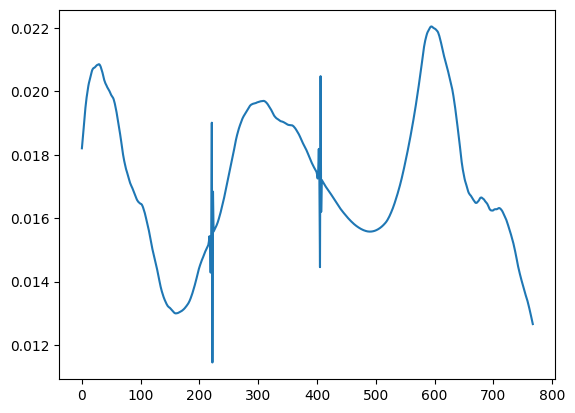

Sentence 1: Two women are embracing while holding to go packages.
Sentence 2: The sisters are hugging goodbye while holding to go packages after just eating lunch.
Similarity: 0.5423648953437805
labels: ['neutral', 'entailment', 'neutral', 'neutral', 'neutral']


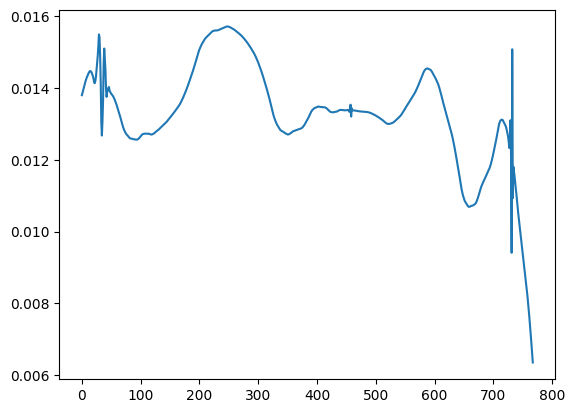

Sentence 1: Two women are embracing while holding to go packages.
Sentence 2: Two woman are holding packages.
Similarity: 0.7673639059066772
labels: ['entailment', 'entailment', 'entailment', 'entailment', 'entailment']


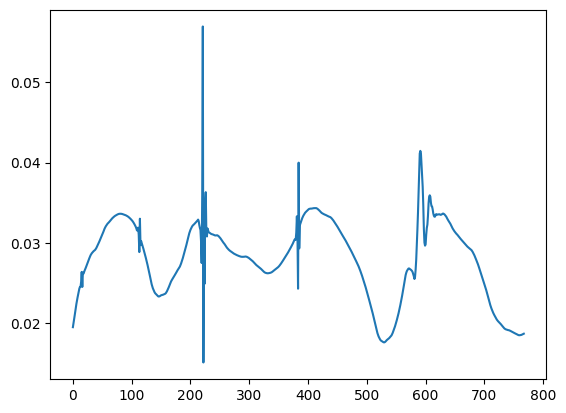

Sentence 1: Two women are embracing while holding to go packages.
Sentence 2: The men are fighting outside a deli.
Similarity: -0.04752456396818161
labels: ['contradiction', 'contradiction', 'contradiction', 'contradiction', 'contradiction']


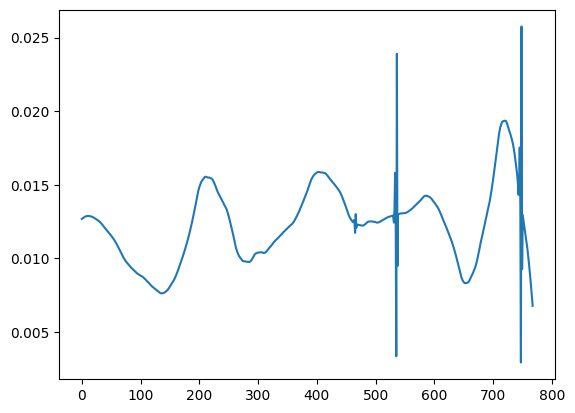

Sentence 1: Two young children in blue jerseys, one with the number 9 and one with the number 2 are standing on wooden steps in a bathroom and washing their hands in a sink.
Sentence 2: Two kids in numbered jerseys wash their hands.
Similarity: 0.7458836436271667
labels: ['entailment', 'entailment', 'entailment', 'entailment', 'entailment']


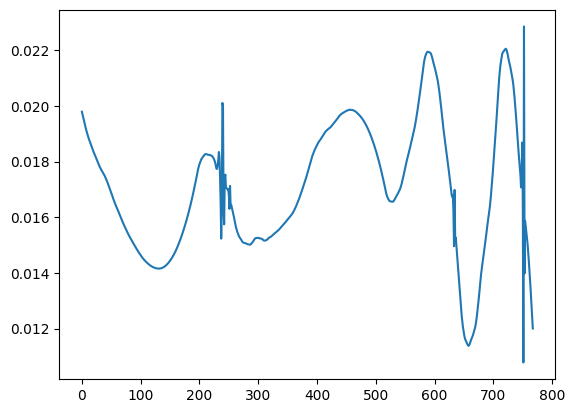

Sentence 1: Two young children in blue jerseys, one with the number 9 and one with the number 2 are standing on wooden steps in a bathroom and washing their hands in a sink.
Sentence 2: Two kids at a ballgame wash their hands.
Similarity: 0.6014889478683472
labels: ['neutral', 'neutral', 'neutral', 'entailment', 'entailment']


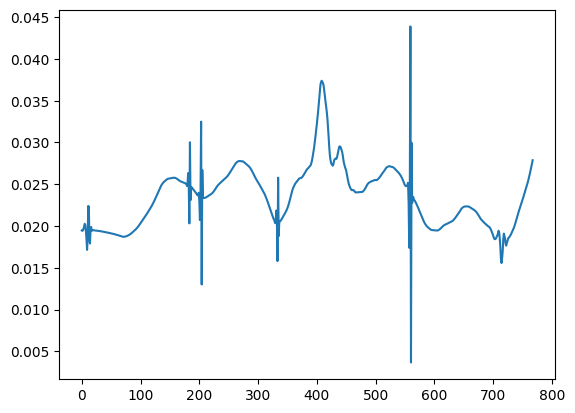

Sentence 1: Two young children in blue jerseys, one with the number 9 and one with the number 2 are standing on wooden steps in a bathroom and washing their hands in a sink.
Sentence 2: Two kids in jackets walk to school.
Similarity: 0.2912599444389343
labels: ['contradiction', 'contradiction', 'contradiction', 'contradiction', 'contradiction']


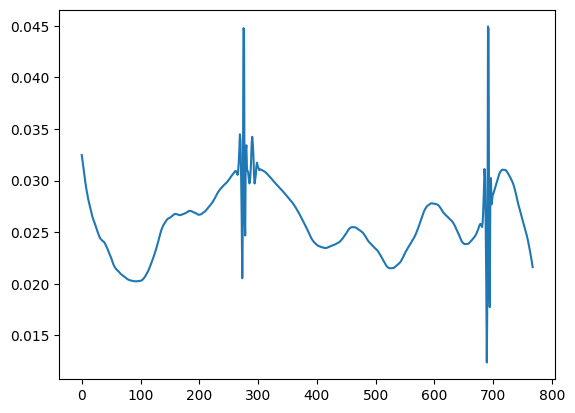

Sentence 1: A man selling donuts to a customer during a world exhibition event held in the city of Angeles
Sentence 2: A woman drinks her coffee in a small cafe.
Similarity: 0.07016941905021667
labels: ['contradiction', 'contradiction', 'contradiction', 'contradiction', 'contradiction']


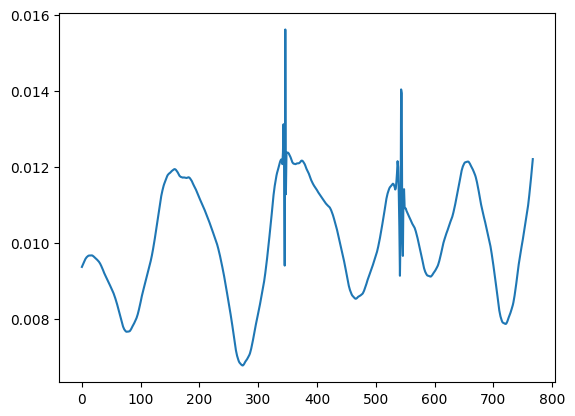

Sentence 1: A man selling donuts to a customer during a world exhibition event held in the city of Angeles
Sentence 2: A man selling donuts to a customer during a world exhibition event while people wait in line behind him.
Similarity: 0.8593881130218506
labels: ['neutral', 'entailment', 'entailment', 'neutral', 'neutral']


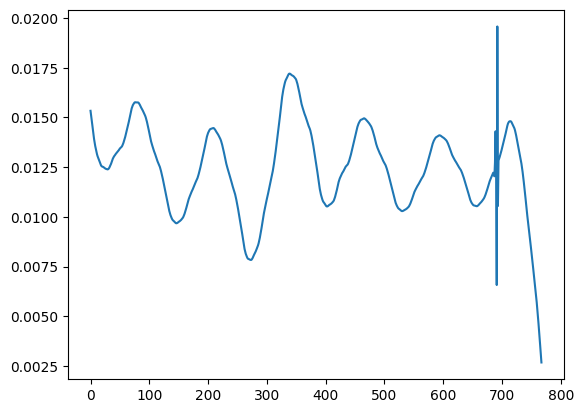

Sentence 1: A man selling donuts to a customer during a world exhibition event held in the city of Angeles
Sentence 2: A man selling donuts to a customer.
Similarity: 0.769756555557251
labels: ['entailment', 'neutral', 'entailment', 'entailment', 'entailment']


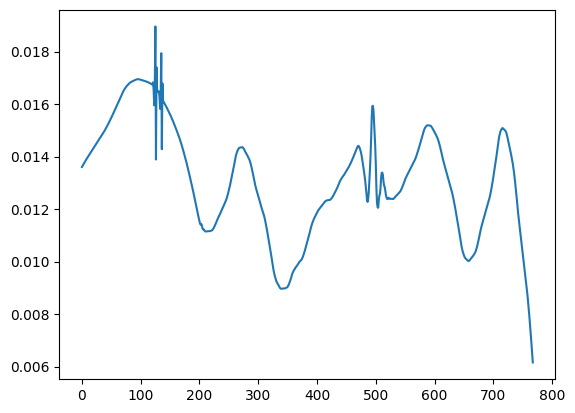

Sentence 1: Two young boys of opposing teams play football, while wearing full protection uniforms and helmets.
Sentence 2: boys play football
Similarity: 0.760200023651123
labels: ['entailment', 'neutral', 'entailment', 'entailment', 'neutral']


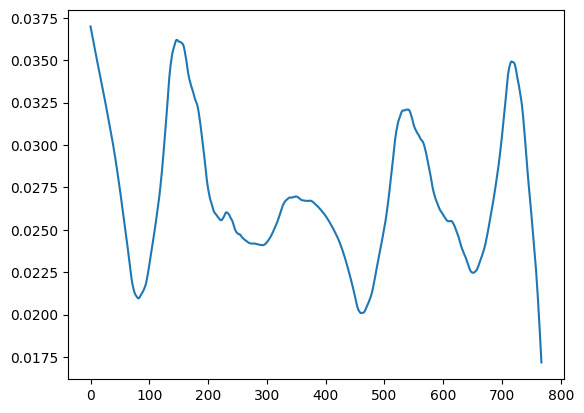

Sentence 1: Two young boys of opposing teams play football, while wearing full protection uniforms and helmets.
Sentence 2: dog eats out of bowl
Similarity: -0.060197435319423676
labels: ['contradiction', 'contradiction', 'contradiction', 'contradiction', 'contradiction']


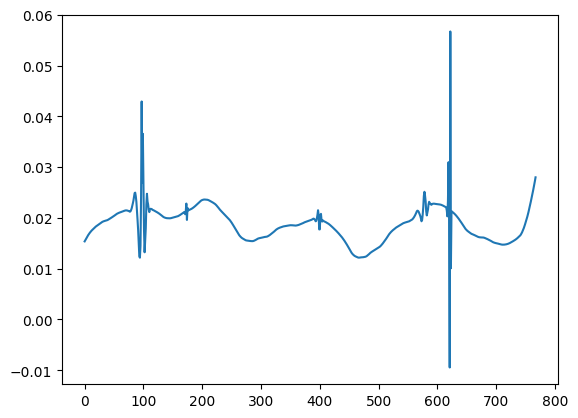

Sentence 1: Two young boys of opposing teams play football, while wearing full protection uniforms and helmets.
Sentence 2: boys scoring a touchdown
Similarity: 0.5351916551589966
labels: ['neutral', 'neutral', 'neutral', 'neutral', 'neutral']


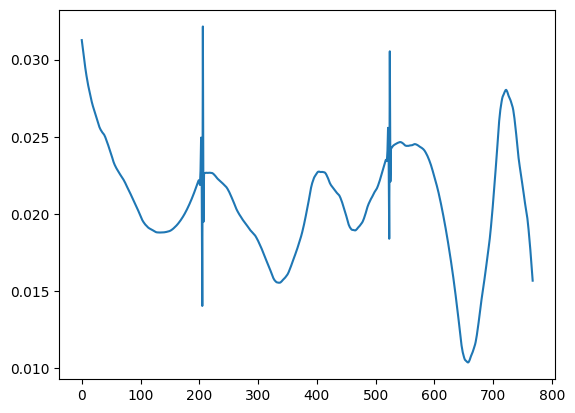

Sentence 1: A man in a blue shirt standing in front of a garage-like structure painted with geometric designs.
Sentence 2: A man is repainting a garage
Similarity: 0.41814571619033813
labels: ['neutral', 'entailment', 'neutral', 'neutral', 'neutral']


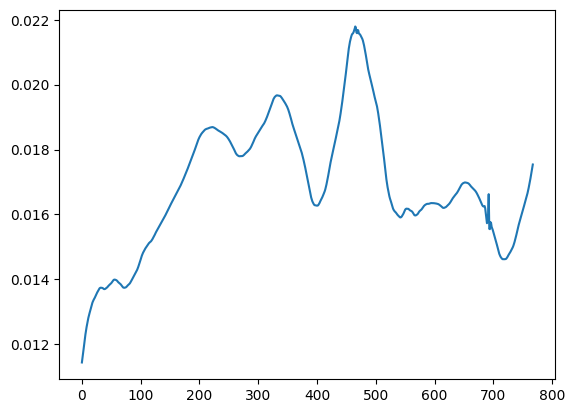

Sentence 1: A man in a blue shirt standing in front of a garage-like structure painted with geometric designs.
Sentence 2: A man is wearing a blue shirt
Similarity: 0.6188662052154541
labels: ['entailment', 'neutral', 'neutral', 'entailment', 'entailment']


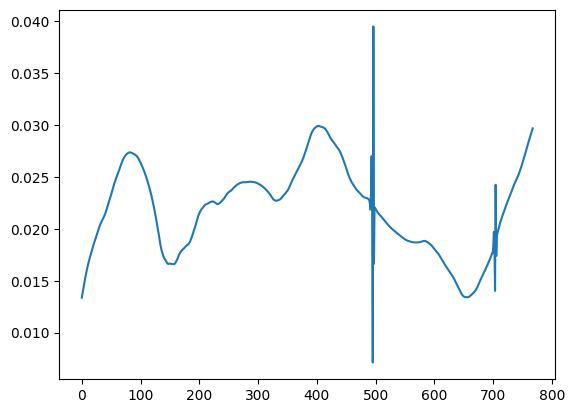

Sentence 1: A man in a blue shirt standing in front of a garage-like structure painted with geometric designs.
Sentence 2: A man is wearing a black shirt
Similarity: 0.32221245765686035
labels: ['contradiction', 'contradiction', 'contradiction', 'contradiction', 'contradiction']


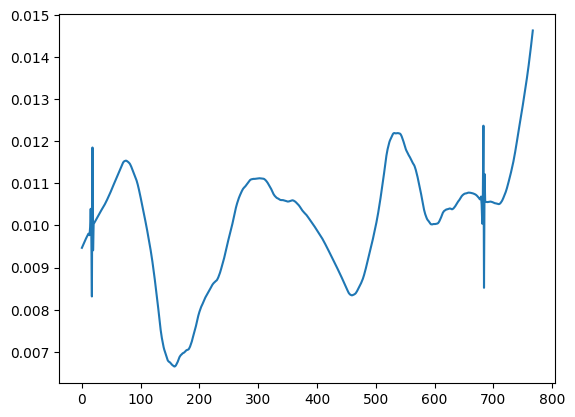

Sentence 1: Under a blue sky with white clouds, a child reaches up to touch the propeller of a plane standing parked on a field of grass.
Sentence 2: A child is reaching to touch the propeller of a plane.
Similarity: 0.8437559604644775
labels: ['entailment', 'neutral', 'entailment', 'neutral', 'entailment']


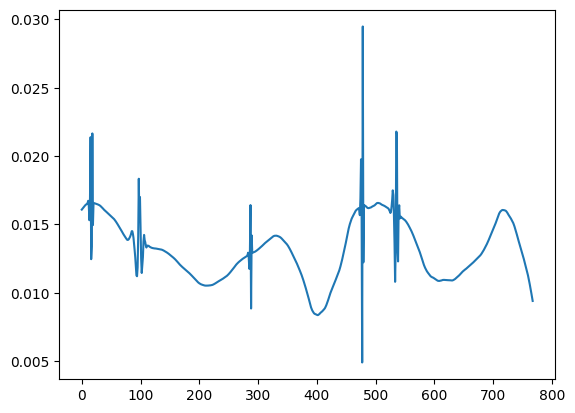

Sentence 1: Under a blue sky with white clouds, a child reaches up to touch the propeller of a plane standing parked on a field of grass.
Sentence 2: A child is reaching to touch the propeller out of curiosity.
Similarity: 0.7586460709571838
labels: ['neutral', 'entailment', 'neutral', 'neutral', 'neutral']


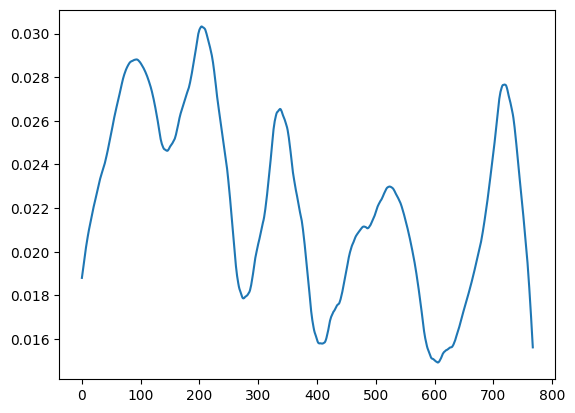

Sentence 1: Under a blue sky with white clouds, a child reaches up to touch the propeller of a plane standing parked on a field of grass.
Sentence 2: A child is playing with a ball.
Similarity: 0.31854552030563354
labels: ['contradiction', 'contradiction', 'contradiction', 'contradiction', 'contradiction']


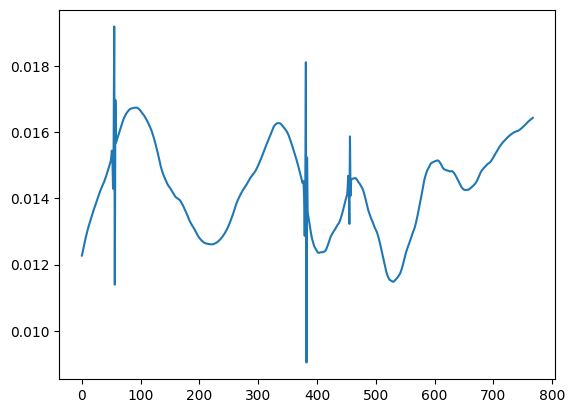

Sentence 1: A woman is doing a cartwheel while wearing a bikini in the sand next to the beach.
Sentence 2: A woman is doing a cartwheel.
Similarity: 0.7049238085746765
labels: ['entailment', 'entailment', 'entailment', 'entailment', 'entailment']


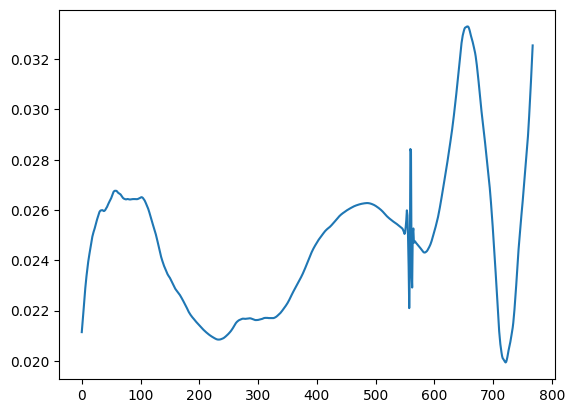

Sentence 1: A woman is doing a cartwheel while wearing a bikini in the sand next to the beach.
Sentence 2: A woman is fixing her home.
Similarity: 0.17002087831497192
labels: ['contradiction', 'contradiction', 'contradiction', 'contradiction', 'contradiction']


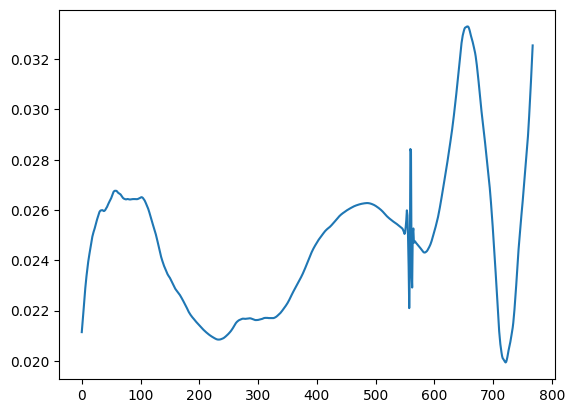

In [32]:
import pywt
def denoize(arr):
    coeffs = pywt.wavedec(arr, 'db4', level=6)
    sigma = np.median(np.abs(coeffs[-1])) / 0.6745
    threshold = sigma * np.sqrt(2 * np.log(len(arr)))
    coeffs = [pywt.threshold(c, threshold, 'soft') for c in coeffs]
    return pywt.waverec(coeffs, 'db4')

for val in vals:
    sentence1 = val["sentence1"]
    sentence2 = val["sentence2"]
    encodings1 = val["embeddings1"]
    encodings2 = val["embeddings2"]
    similarity = val["similarity"]
    labels = val["labels"]
    x = np.arange(len(encodings1))
    y = denoize(np.abs(encodings1 - encodings2))
    plt.plot(x, y)
    plt.show()
    print(f"Sentence 1: {sentence1}\nSentence 2: {sentence2}")
    print(f"Similarity: {similarity}")
    print(f"labels: {labels}")

plt.plot(x,y)


Could potentially split parameters into 5 seperate sub categories, train model to detect potential areas of 'entailment, contradiction and neutrality'
is this all the model detects? 
This 